# Keşifsel Veri Analizi EDA

In [49]:
import numpy as np #linear algebra
import pandas as pd #data processing
import seaborn as sns #visualization
import matplotlib.pyplot as plt #visualization
import plotly.express as px #visualization
import missingno as msno #missing no analysis

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold, train_test_split
from sklearn.metrics import precision_score, confusion_matrix

from sklearn import tree

In [50]:
df = pd.read_csv("water_potability.csv")

In [51]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


Dependent Variable Analysis (Bağımlı Değişken Analizi)

In [53]:
d = df["Potability"].value_counts().reset_index()
d.columns = ["Potability", "count"]
d

,Potability,count
0,0,1998
1,1,1278


In [54]:
# Pie chart oluştur
fig = px.pie(
    d, 
    values="count", 
    names="Potability", 
    hole=0.35, 
    opacity=0.8, 
    labels={"Potability": "Potability", "count": "Number of Samples"}
)

# Grafik düzenlemeleri
fig.update_layout(title=dict(text="Pie Chart of Potability Feature"))
fig.update_traces(textposition="outside", textinfo="percent+label")
fig.show()

# Grafiği HTML olarak kaydet
fig.write_html("potability_pie_chart.html")


Korelasyon Analizi

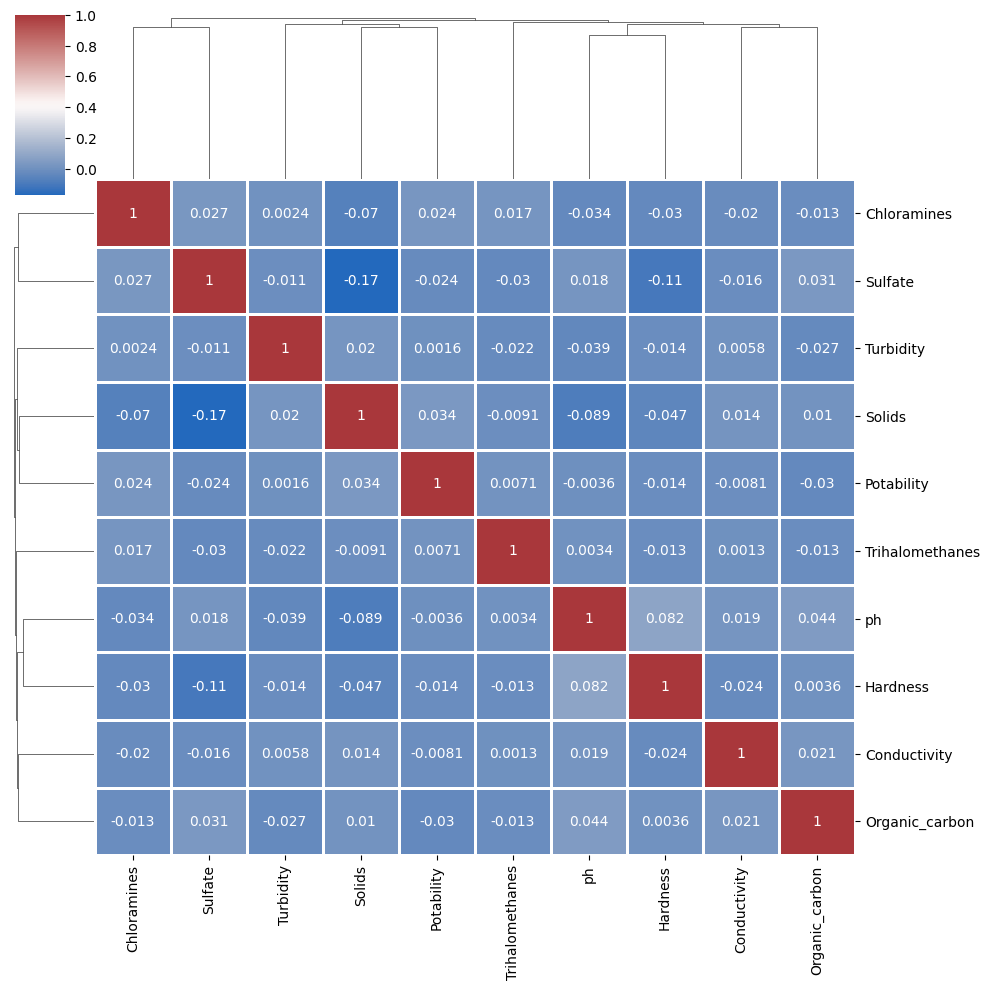

In [58]:
correlation = sns.clustermap(df.corr(), cmap = "vlag", dendrogram_ratio=(0.1, 0.2), annot=True, linewidths=0.8, figsize = (10,10))
plt.show()
correlation.savefig("correlation_analysis.png")

Distribution of Features

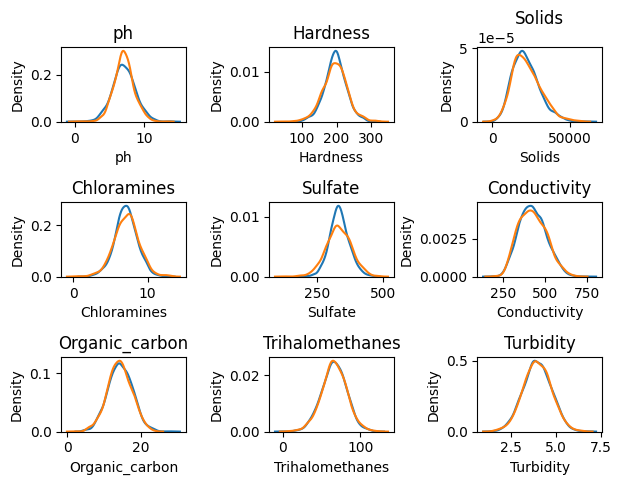

In [62]:
non_potable = df.query("Potability == 0")
potable = df.query("Potability == 1")

plt.figure()
for ax, col in enumerate(df.columns[:9]):
    plt.subplot(3, 3, ax+1)
    plt.title(col)
    sns.kdeplot(x = non_potable[col], label = "Non Potable")
    sns.kdeplot(x = potable[col], label = "Potable")

plt.tight_layout()

plt.savefig("distribution_of_features.png", dpi=300)  # Grafiği PNG olarak kaydeder



Missing Value

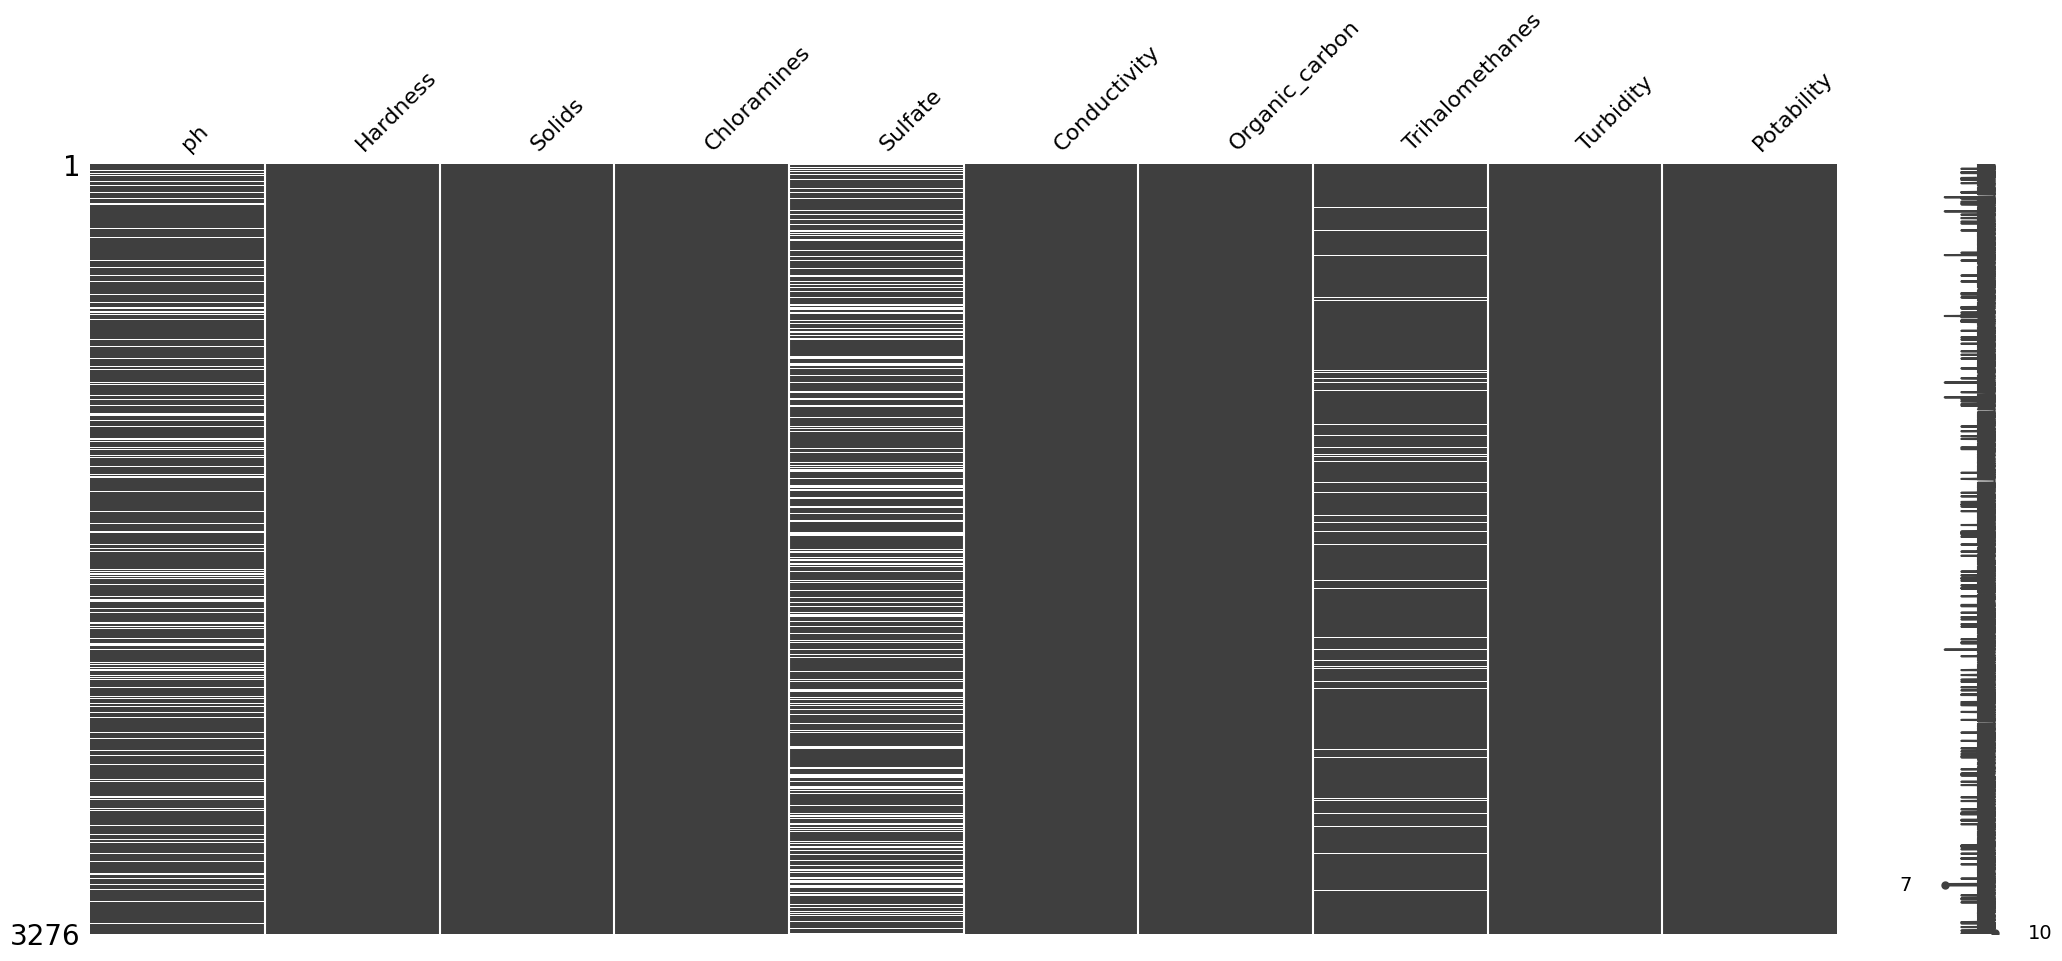

In [71]:
msno.matrix(df)

fig = plt.gcf()
fig.savefig("missing_data_matrix.png", dpi=300, bbox_inches="tight")

plt.show()
